In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
# pd.options.display.mpl_style='default'
import seaborn as sns
from disaggregation import *
from clustering_visual import *

In [2]:
filename='campus21.log.20141208-20141214.log.gz.csv.csv'
# filename='campus21.log.20141110-20141116.log.gz.csv.csv'
# filename="campus21.log.20141013-20141026.log.gz.csv.csv"
# filename='campus21.log.20150105-20150118.log.gz.csv.csv'  # the kitchen and the sports room meter do not show any consumption
# filename ='campus21.log.20141215-20150104.log.gz.csv.csv' # kitchen and sports dont have a lot of consumption; alot of Nan VALUES IN THE DATASET  
# filename = 'campus21.log.20141027-20141109.log.gz.csv.csv'
# filename =  'campus21.log.20150427-20150602.log.gz.csv.csv'
# filename =  'campus21.log.20151001-20151130.log.gz.csv.csv'
# filename = 'campus21.log.20150119-20150201.log.gz.csv.csv'
df= pd.read_csv('./Data/Heating_system_data/{}'.format(filename), header=0,sep=",")
start="2014-11-11 00:00:00"
end= "2014-11-13 23:59:59"

In [3]:
# enter the sampling time 
ts='60T'

In [4]:
df.head()

,Device 1---#-.--.UV-AV-AM EG 01RM01-Z,Device 1---#-.--.UV-AV-AM EG 01RM02-Z,Device 1---#-.--.UV-AV-AM EG 01RM03-Z,Device 1---#-.--.UV-AV-AM EG 01RM04-Z,Device 1---#-.--.UV-AV-AM EG 01RM05-Z,Device 1---#-.--.UV-AV-AM EG 01RM06-Z,Device 1---#-.--.UV-AV-AM EG 01RM07-Z,Device 1---#-.--.UV-AV-AM EG 01RM08-Z,Device 1---#-.--.UV-AV-AM EG 01RM09-Z,Device 1---#-.--.UV-AV-AM EG 01RM10-Z,...,Device 1---PC00_K22_DDC03200-USV,Device 1---PC00_K22_DDC03300-USV,Device 1---PC00_K22_DDC03500-USV,Device 1---PC00_K22_DDC03800-USV,Device 1---PC00_K22_DDC03801-USV,Device 1---PC01_K31_DDC00999-USV,Device 1---PZT Alarme unterdr�,Device 1---Wartung,Device 1---Zentral Ein Bauteil 1-3,Timestamp
0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,1,Sensor not set in Campus21 Data Event,Sensor not set in Campus21 Data Event,0,2014-12-08 00:03:26.739
1,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,1,Sensor not set in Campus21 Data Event,Sensor not set in Campus21 Data Event,0,2014-12-08 00:13:26.751
2,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,1,Sensor not set in Campus21 Data Event,Sensor not set in Campus21 Data Event,0,2014-12-08 00:23:26.765
3,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,1,Sensor not set in Campus21 Data Event,Sensor not set in Campus21 Data Event,0,2014-12-08 00:33:26.77
4,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,1,Sensor not set in Campus21 Data Event,Sensor not set in Campus21 Data Event,0,2014-12-08 00:43:26.835


In [5]:
# setting the index to timestamp
df['Timestamp']=pd.to_datetime(df['Timestamp'],)
df=df.set_index(['Timestamp'])

In [6]:
df.head()

,Device 1---#-.--.UV-AV-AM EG 01RM01-Z,Device 1---#-.--.UV-AV-AM EG 01RM02-Z,Device 1---#-.--.UV-AV-AM EG 01RM03-Z,Device 1---#-.--.UV-AV-AM EG 01RM04-Z,Device 1---#-.--.UV-AV-AM EG 01RM05-Z,Device 1---#-.--.UV-AV-AM EG 01RM06-Z,Device 1---#-.--.UV-AV-AM EG 01RM07-Z,Device 1---#-.--.UV-AV-AM EG 01RM08-Z,Device 1---#-.--.UV-AV-AM EG 01RM09-Z,Device 1---#-.--.UV-AV-AM EG 01RM10-Z,...,Device 1---PC00_K22_DDC03100-USV,Device 1---PC00_K22_DDC03200-USV,Device 1---PC00_K22_DDC03300-USV,Device 1---PC00_K22_DDC03500-USV,Device 1---PC00_K22_DDC03800-USV,Device 1---PC00_K22_DDC03801-USV,Device 1---PC01_K31_DDC00999-USV,Device 1---PZT Alarme unterdr�,Device 1---Wartung,Device 1---Zentral Ein Bauteil 1-3
Timestamp,,,,,,,,,,,,,,,,,,,,,
2014-12-08 00:03:26.739,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,1,Sensor not set in Campus21 Data Event,Sensor not set in Campus21 Data Event,0
2014-12-08 00:13:26.751,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,1,Sensor not set in Campus21 Data Event,Sensor not set in Campus21 Data Event,0
2014-12-08 00:23:26.765,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,1,Sensor not set in Campus21 Data Event,Sensor not set in Campus21 Data Event,0
2014-12-08 00:33:26.770,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,1,Sensor not set in Campus21 Data Event,Sensor not set in Campus21 Data Event,0
2014-12-08 00:43:26.835,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,1,Sensor not set in Campus21 Data Event,Sensor not set in Campus21 Data Event,0


In [7]:
#extracting heat related meters
heat_meters=[col for col in df.columns if "MOD-WMZ0" in col]
heat_meters.remove('Device 1---MOD-WMZ06-10-65-160-156-ME2')

In [8]:
#extracting only energy 
energy_acc=[dev for dev in heat_meters if "ME1" in dev]
df_sub=df[energy_acc]
df_sub.iloc[:,-1]=df_sub.filter(regex="WMZ07") # assuming the WMZ08 meter is consuming the same as WMZ07
df_sub=pd.concat([df_sub,df["Device 1---ISP19H004 -ZM UG1 01ZM01"]], axis=1) # adding the correct grass heating
# df_sub = pd.to_numeric(df_sub, errors='coerce')
df_sub=df_sub.convert_objects(convert_numeric=True, convert_dates=True)
df_sub.head()

C:\Users\nle5975\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\core\indexing.py:508: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\nle5975\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Device 1---MOD-WMZ01-10-65-160-157-ME1,Device 1---MOD-WMZ02-10-65-160-159-ME1,Device 1---MOD-WMZ03-10-65-160-159-ME1,Device 1---MOD-WMZ04-10-65-160-159-ME1,Device 1---MOD-WMZ05-10-65-160-159-ME1,Device 1---MOD-WMZ07-10-65-160-164-ME1,Device 1---MOD-WMZ08-10-65-160-165-ME1,Device 1---ISP19H004 -ZM UG1 01ZM01
Timestamp,,,,,,,,
2014-12-08 00:03:26.739,4887.9,1.8,3.75,89.49,209.09,1120.58,1120.58,5515.9653
2014-12-08 00:13:26.751,4888.1,1.8,3.75,89.49,209.11,1120.61,1120.61,5516.1650
2014-12-08 00:23:26.765,4888.3,1.8,3.75,89.49,209.12,1120.64,1120.64,5516.1650
2014-12-08 00:33:26.770,4888.5,1.8,3.75,89.49,209.14,1120.67,1120.67,5516.3650
2014-12-08 00:43:26.835,4888.7,1.8,3.75,89.49,209.15,1120.69,1120.69,5516.3650


In [9]:
df_sub=df_sub.convert_objects(convert_numeric=True)
total_cons=df_sub.tail().iloc[-1][0]-df_sub.head().iloc[-1][0]
print total_cons

117.6


C:\Users\nle5975\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [10]:
df_sub=df_sub.diff(periods=1)
df_sub.head()

,Device 1---MOD-WMZ01-10-65-160-157-ME1,Device 1---MOD-WMZ02-10-65-160-159-ME1,Device 1---MOD-WMZ03-10-65-160-159-ME1,Device 1---MOD-WMZ04-10-65-160-159-ME1,Device 1---MOD-WMZ05-10-65-160-159-ME1,Device 1---MOD-WMZ07-10-65-160-164-ME1,Device 1---MOD-WMZ08-10-65-160-165-ME1,Device 1---ISP19H004 -ZM UG1 01ZM01
Timestamp,,,,,,,,
2014-12-08 00:03:26.739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-08 00:13:26.751,0.2,0,0,0,0.02,0.03,0.03,0.1997
2014-12-08 00:23:26.765,0.2,0,0,0,0.01,0.03,0.03,0.0000
2014-12-08 00:33:26.770,0.2,0,0,0,0.02,0.03,0.03,0.2000
2014-12-08 00:43:26.835,0.2,0,0,0,0.01,0.02,0.02,0.0000


In [11]:
# ground truth data prepared
df_sub= df_sub.resample(ts, how="sum")

In [12]:
mains_ds=df_sub["Device 1---ISP19H004 -ZM UG1 01ZM01"] + df_sub["Device 1---MOD-WMZ07-10-65-160-164-ME1"]
mains_ds=pd.DataFrame(data=mains_ds, columns={'Mains'})

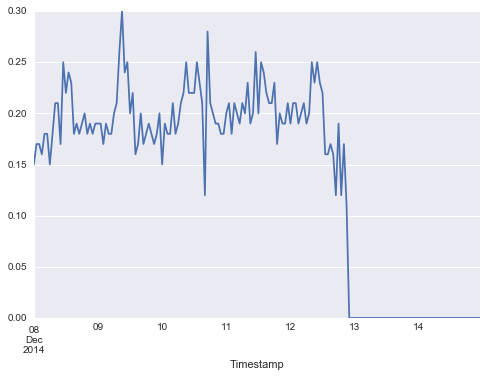

In [13]:
df_sub["Device 1---MOD-WMZ07-10-65-160-164-ME1"].plot()

In [14]:
# collecting all the operational variables for the east office
df_office=pd.concat([df["Device 1---ISP19H007 -TM UG1 01XC01"],df["Device 1---ISP19H007 -RV UG1 01YB01"], df["Device 1---ISP19H007 -TM UG1 01ZP01"],df["Device 1---ISP19H007 -PU UG1 01RM01"]], axis=1)
temp_diff=df["Device 1---MOD-WMZ07-10-65-160-164-ME3"]- df["Device 1---MOD-WMZ07-10-65-160-164-ME4"]
temp_diff= pd.DataFrame(temp_diff, columns={"Temp_diff_office"})
outside_temp=df["Device 1---ISP19H001 -TM UG1 01ME03"]
df_office_op= pd.concat([df_office,  outside_temp, temp_diff ], axis=1)
df_office_op=df_office.resample(ts, how="mean")

In [15]:
df_office_op.head()

,Device 1---ISP19H007 -TM UG1 01XC01,Device 1---ISP19H007 -RV UG1 01YB01,Device 1---ISP19H007 -TM UG1 01ZP01,Device 1---ISP19H007 -PU UG1 01RM01
Timestamp,,,,
2014-12-08 00:00:00,62.021498,56.615144,0,1
2014-12-08 01:00:00,51.661836,29.104634,1,1
2014-12-08 02:00:00,51.507698,41.406329,1,1
2014-12-08 03:00:00,51.610456,48.552704,1,1
2014-12-08 04:00:00,52.706559,45.724720,1,1


In [16]:
# collecting all the operational variables for  the grass heating system
grass_op = ["Device 1---ISP19H004 -TM UG1 01ME11","Device 1---ISP19H004 -TM UG1 01ME20","Device 1---ISP19H004 -TM UG1 01XS05","Device 1---ISP19H001 -TM UG1 01ME03", "Device 1---ISP19H004 -TA UG1 01ST01", "Device 1---ISP19H004 -TA UG1 01ST02", "Device 1---ISP19H004 -TM UG1 01ZP04","Device 1---ISP19H004 -TM UG1 01ZP05"]
temp_diff=  df['Device 1---ISP19H001 -TM UG1 01ME08']-df["Device 1---ISP19H001 -TM UG1 01ME09"]
temp_diff= pd.DataFrame(temp_diff, columns={"Temp_diff_grass"})
df_grass_op= pd.concat([df[meter] for meter in grass_op], axis=1)
df_grass_op= pd.concat([df_grass_op, temp_diff], axis=1)
df_grass_op = df_grass_op.resample(ts, how="mean")


In [17]:
# pca on df_grass_op
from sklearn import decomposition
pca= decomposition.PCA(n_components=8, whiten=True)
pca.fit(df_grass_op)
df_grass_op= pca.transform(df_grass_op)

# PCA on df_office
pca= decomposition.PCA(whiten=True)
pca.fit(df_office_op)
df_office_op= pca.transform(df_office_op)


In [18]:
df_office_op[:10]

array([[-0.27337889,  0.60864483, -0.08738909, -0.23373781],
       [ 2.65017642,  0.77645268,  1.42941419,  0.03458933],
       [ 1.52148895, -0.44938029,  1.64905536,  0.00756615],
       [ 0.85866572, -1.11543491,  1.80557997, -0.00842629],
       [ 1.07875717, -0.57956188,  1.91465181, -0.00383555],
       [-0.19510451,  1.02449969,  0.06668158, -0.23262022],
       [ 0.32307947,  1.41020666, -0.12477203, -0.21980892],
       [-0.48368618,  0.5909099 ,  0.0613445 , -0.23925471],
       [-1.43699704, -0.06484278,  0.44111527, -0.26294696],
       [-0.88921648,  0.54025304,  0.33972118, -0.24985518]])

In [19]:
df_grass_op.shape

(168L, 8L)

In [32]:
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
def clustering(data, n_clusters, model):
    n_samples=data.shape[0]
    if model=="kmeans":
        kmeans= KMeans(init='k-means++', n_clusters=n_clusters)
        kmeans.fit(data.reshape(n_samples, -1))
        return kmeans.cluster_centers_, kmeans.labels_, kmeans
    if model=="GMM":
        gmm=GMM(covariance_type='full', n_components=n_clusters)
        labels= gmm.fit_predict(data)
        return gmm.means_, labels, gmm

In [21]:
def rmse(y_est, y):
    rmse=np.sqrt(np.mean(np.square(y-y_est)))
    return rmse

In [22]:
cluster, labels, kmodel=clustering(df_grass_op, 3,"GMM")
for i in xrange(6):
    print df_sub["Device 1---ISP19H004 -ZM UG1 01ZM01"][labels==i].mean()

0.28032295082
0.049975
0.173683157895
nan
nan
nan


In [23]:
cluster_en, labels_office,_= clustering(df_sub.ix[:,"Device 1---ISP19H004 -ZM UG1 01ZM01"].reshape(-1,1),3,"GMM")
cluster_en

array([[  2.74134210e-01],
       [  6.16241877e-01],
       [  1.04983870e-09]])

In [24]:
cluster, labels, model=clustering(df_office_op, 3, "GMM")
for i in xrange(5):
    print df_sub["Device 1---MOD-WMZ07-10-65-160-164-ME1"][labels==i].mean()

0.111666666667
0.140895522388
0.135
nan
nan


In [25]:
cluster_en, labels_office,_= clustering(df_sub.ix[1:,"Device 1---MOD-WMZ07-10-65-160-164-ME1"].reshape(-1,1),3,"GMM")

cluster_en

array([[  1.98319702e-01],
       [  4.01968554e-05],
       [  1.97733549e-01]])

In [26]:
appliances ={'grass': df_sub["Device 1---ISP19H004 -ZM UG1 01ZM01"], 'office_east': df_sub["Device 1---MOD-WMZ07-10-65-160-164-ME1"]}

In [27]:
def optimal_state(state_list, state_labels, appliance_name):
    num_states=len(state_list)
    states_table=pd.DataFrame(index=state_labels.index)
    for i in xrange(num_states):
        states_table["{}{}".format(appliance_name, i+1)]=(state_labels==i)
    return states_table.astype(np.int8)

In [33]:
# benchmarking the performance
state_centres={}
states_table= pd.DataFrame()
appliance_states=pd.DataFrame(index=df_sub.index, columns=appliances.keys())
for appliance,_ in appliances.iteritems():
    state_centres[appliance], appliance_states[appliance],_=clustering(appliances[appliance],3, "kmeans")
    states_table = pd.concat([states_table, optimal_state(state_centres[appliance], appliance_states[appliance], appliance)], axis=1)

In [34]:
state_centres

{'grass': array([[  4.44089210e-16],
        [  6.31528947e-01],
        [  2.83366667e-01]]), 'office_east': array([[  2.21896552e-01],
        [ -1.11022302e-16],
        [  1.74333333e-01]])}

In [92]:
states_table.head()

,grass1,grass2,grass3,office_east1,office_east2,office_east3,Ghost_Power
Timestamp,,,,,,,
2014-12-08 00:00:00,0,1,0,0,0,1,1
2014-12-08 01:00:00,0,1,0,0,0,1,1
2014-12-08 02:00:00,0,1,0,0,0,1,1
2014-12-08 03:00:00,0,1,0,0,0,1,1
2014-12-08 04:00:00,0,1,0,0,0,1,1


In [93]:
# multistate
from collections import defaultdict
t_est=48
nep_history={}
nep_hour_history={}
fraction_history=defaultdict(list)
fraction_agg_history=defaultdict(list)
for k, v in appliances.iteritems():
    nep_history["{}".format(k)]=defaultdict(list)
    nep_hour_history["{}".format(k)]=defaultdict(list)

data=states_table
data["Ghost_Power"]=1
data= pd.concat([data,mains_ds["Mains"]], axis=1)
# creating the data table that will be used for disaggregation
i=states_table.index[0]
disagg_power_ds = pd.DataFrame(data=np.nan, index=states_table.index, columns= states_table.columns.tolist())
# disaggregating power over intervals of T_est ( estimation periods)
while i <= (states_table.tail(n=1).index):
    start_time=i
    end_time=i+timedelta(hours=t_est)
#             data=data_table_ds[start_time:end_time].dropna(axis=0)
    data_ds=data[start_time:end_time]
    optim,optim_var = disagg_chunk(data_ds)
    disagg_power_ds.loc[start_time:end_time,:]=optim.x
    i+=timedelta(hours=t_est)
#         for k, v in disagg_power_ds.iteritems():
#             if k<>"Ghost_Power":
#                 nep, nep_hour=error_metrics(appliances_ds[k],disagg_power_ds[k], data_table_ds[k] )
#                 nep_history["{}".format(k)][sf].append(nep)  
#                 nep_hour_history["{}".format(k)][sf].append(nep_hour) 
#         fraction_accuracy, fraction_agg_accuracy=fraction_accuracy_metrics(appliances_ds, disagg_power_ds, data_table_ds)
#         print sf, fraction_accuracy, fraction_agg_accuracy
#         fraction_history["{}".format(sf)].append(fraction_accuracy)
#         fraction_agg_history["{}".format(sf)].append(fraction_agg_accuracy)

In [94]:
grass_states = [state for state in states_table.columns.tolist() if "grass" in state]

In [95]:
disagg_power_ds.head()

,grass1,grass2,grass3,office_east1,office_east2,office_east3,Ghost_Power
Timestamp,,,,,,,
2014-12-08 00:00:00,0.03977,0.673284,0.365038,0.187463,1,0.119223,0.006939
2014-12-08 01:00:00,0.03977,0.673284,0.365038,0.187463,1,0.119223,0.006939
2014-12-08 02:00:00,0.03977,0.673284,0.365038,0.187463,1,0.119223,0.006939
2014-12-08 03:00:00,0.03977,0.673284,0.365038,0.187463,1,0.119223,0.006939
2014-12-08 04:00:00,0.03977,0.673284,0.365038,0.187463,1,0.119223,0.006939


In [96]:
energy= states_table*disagg_power_ds
energy.head()

,grass1,grass2,grass3,office_east1,office_east2,office_east3,Ghost_Power
Timestamp,,,,,,,
2014-12-08 00:00:00,0,0.673284,0,0,0,0.119223,0.006939
2014-12-08 01:00:00,0,0.673284,0,0,0,0.119223,0.006939
2014-12-08 02:00:00,0,0.673284,0,0,0,0.119223,0.006939
2014-12-08 03:00:00,0,0.673284,0,0,0,0.119223,0.006939
2014-12-08 04:00:00,0,0.673284,0,0,0,0.119223,0.006939


In [97]:
grass_disagg=energy.iloc[:,:3].sum(axis=1)

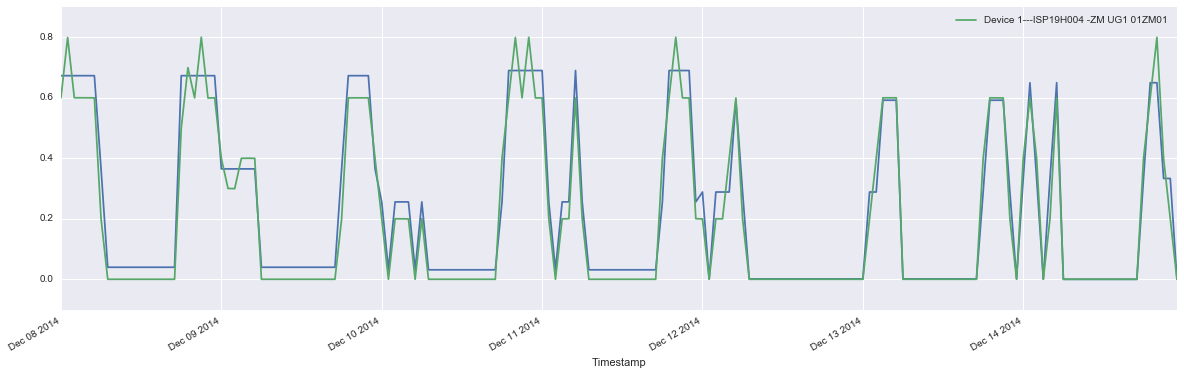

In [98]:
plt.figure(figsize=(20,6))
plt.plot(grass_disagg)
df_sub["Device 1---ISP19H004 -ZM UG1 01ZM01"].plot()
plt.legend()

In [99]:
office_disagg=energy.iloc[:,3:6].sum(axis=1)

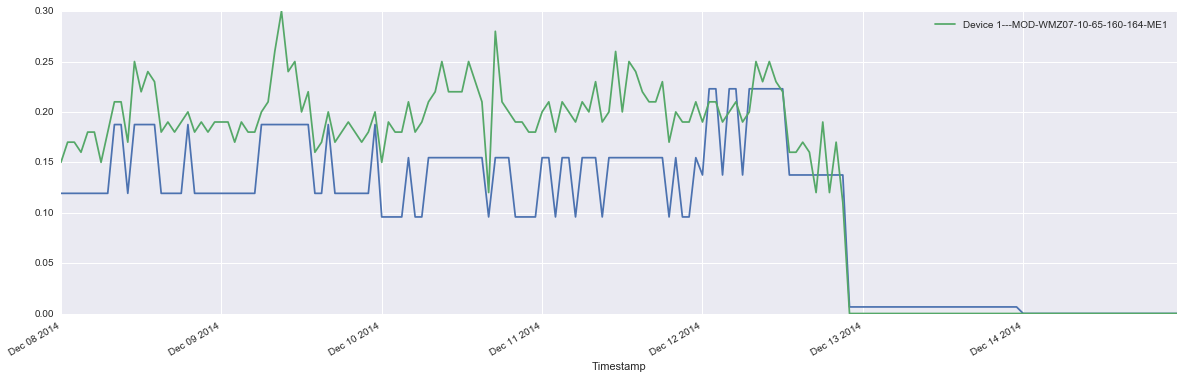

In [100]:
plt.figure(figsize=(20,6))
plt.plot(office_disagg)
df_sub["Device 1---MOD-WMZ07-10-65-160-164-ME1"].plot()
plt.legend()

In [101]:
print rmse(grass_disagg.values,df_sub["Device 1---ISP19H004 -ZM UG1 01ZM01"].values)
print rmse(office_disagg.values, df_sub["Device 1---MOD-WMZ07-10-65-160-164-ME1"].values)

0.0597487222999
0.0507623825467


In [102]:
df_sub.head()

,Device 1---MOD-WMZ01-10-65-160-157-ME1,Device 1---MOD-WMZ02-10-65-160-159-ME1,Device 1---MOD-WMZ03-10-65-160-159-ME1,Device 1---MOD-WMZ04-10-65-160-159-ME1,Device 1---MOD-WMZ05-10-65-160-159-ME1,Device 1---MOD-WMZ07-10-65-160-164-ME1,Device 1---MOD-WMZ08-10-65-160-165-ME1,Device 1---ISP19H004 -ZM UG1 01ZM01
Timestamp,,,,,,,,
2014-12-08 00:00:00,1.0,0,0,0.00,0.07,0.15,0.15,0.6001
2014-12-08 01:00:00,1.3,0,0,0.02,0.07,0.17,0.17,0.7996
2014-12-08 02:00:00,1.2,0,0,0.01,0.06,0.17,0.17,0.6003
2014-12-08 03:00:00,1.0,0,0,0.01,0.03,0.16,0.16,0.6001
2014-12-08 04:00:00,1.2,0,0,0.02,0.02,0.18,0.18,0.5996
